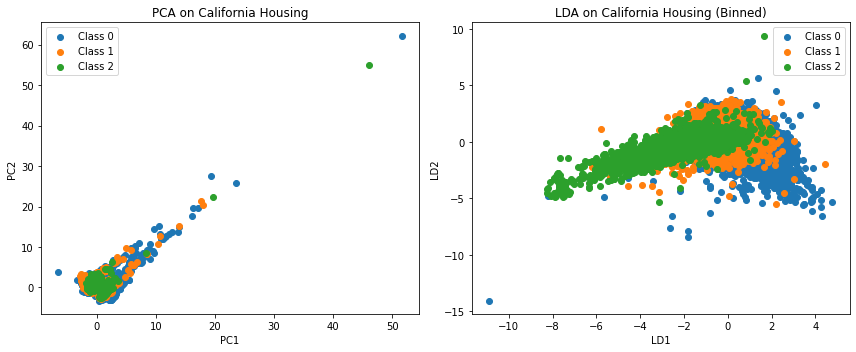

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Convert continuous target into categories (e.g. 3 price classes)
y_binned = np.digitize(y, bins=[2, 4])  # Creates 3 classes: 0, 1, 2

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# LDA (2D)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y_binned)

# Plotting
plt.figure(figsize=(12, 5))

# PCA Plot
plt.subplot(1, 2, 1)
for label in np.unique(y_binned):
    plt.scatter(X_pca[y_binned == label, 0], X_pca[y_binned == label, 1], label=f'Class {label}')
plt.title('PCA on California Housing')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# LDA Plot
plt.subplot(1, 2, 2)
for label in np.unique(y_binned):
    plt.scatter(X_lda[y_binned == label, 0], X_lda[y_binned == label, 1], label=f'Class {label}')
plt.title('LDA on California Housing (Binned)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

plt.tight_layout()
plt.show()